In [10]:
# IMPORT STATEMENTS
import sys
sys.path.append("/booleanfs2/sahoo/Hegemon/")
sys.path = ["/booleanfs2/sahoo/BoNE/"] + sys.path

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

try:
    reload  # Python 2.7
except NameError:
    try:
        from importlib import reload  # Python 3.4+
    except ImportError:
        from imp import reload  # Python 3.0 - 3.3
        
import SMaRT.MacUtils as mut
reload(mut)
import matplotlib.pyplot as plt

In [7]:
import pandas as pd
import numpy as np
import bone
reload(bone)
import Datasets
reload(Datasets)
import Datasets_hh
reload(Datasets_hh)
hu = bone.hu

He 2022 lung scblk (n = 11)
E-MTAB-11278 http://hegemon.ucsd.edu/Tools/explore.php?key=lung&id=LU29
11 [2, 9] E-MTAB-11278 http://hegemon.ucsd.edu/Tools/explore.php?key=lung&id=LU29 LU29
[49]
Barnes 2023 lung scblk (n = 16)
E-MTAB-11528 http://hegemon.ucsd.edu/Tools/explore.php?key=lung&id=LU30
16 [8, 5, 3] E-MTAB-11528 http://hegemon.ucsd.edu/Tools/explore.php?key=lung&id=LU30 LU30
[49]
Negretti 2021 [mm lung] (n = 5)
GSE165063 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T118
5 [2, 3] GSE165063 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T118 T118
[56]
[None, None, 5.0, 3, 5.1, -12, -15]
L_labels :  <a list of 1 Text objects>
g.hue_names : ['LM'] 1
[1] [['TYROBP', 'FCER1G']]
Sountoulidis 2023 [human embryonic lung] (n = 13)
GSE215898 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T117
13 [8, 5] GSE215898 http://hegemon.ucsd.edu/Tools/explore.php?key=polyps&id=T117 T117
[2]
age  [5, 5.5, 6, 6, 7, 8, 8.5, 10, 11.5, 12, 12, 13, 14]
L_labels :  <a list of 

Text(0.5, 1.0, 'Regression of C13 vs. Age (Embryonic and Post-natal with EpiEnriched)')

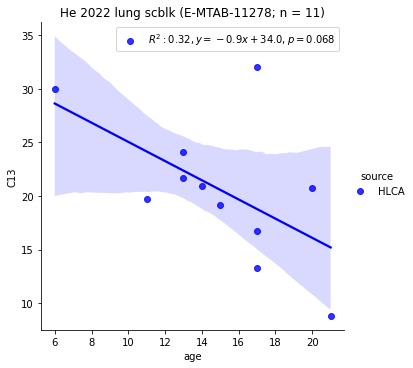

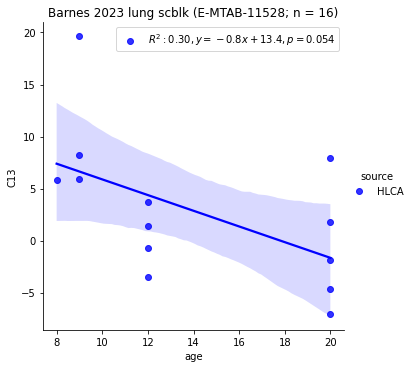

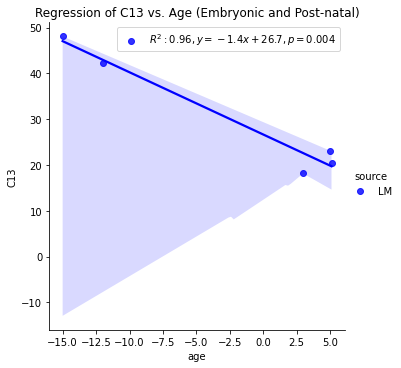

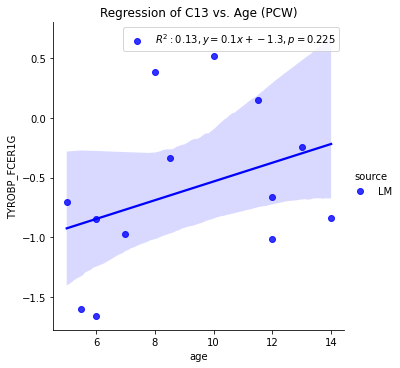

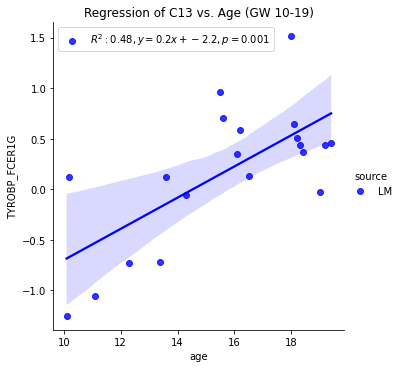

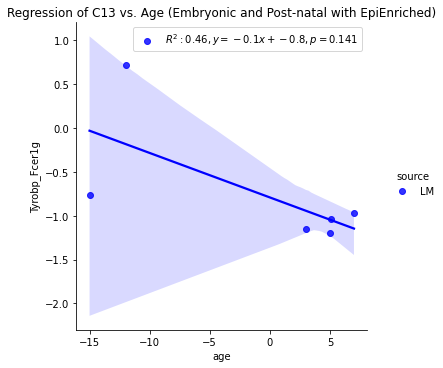

In [13]:
wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getHe2022lungFetal()
ana.orderData(l1, wt1)
atype = ana.h.getSurvName('c Characteristics[age]')
ahash = {'17':17, '13':13, '15':15, '14':14, '6':6, '21':21, '11':11, '20':20}
age = [ahash[k] if k in ahash else None for k in atype]
df = pd.DataFrame()
df['C13'] = list(ana.f_ranks)
df['age'] = age[2:]
df['source'] = 'HLCA'
#df.dropna(inplace=True)
g = bone.sns.lmplot(x='age', y='C13', hue='source', palette=['blue', 'red'], data=df)
import scipy
ax = g.axes[0][0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
for i in range(len(g.hue_names)):
    k = g.hue_names[i]
    c1 = g.data[g._hue_var] == k
    x = g.data[g._x_var][c1]
    y = g.data[g._y_var][c1]
    r, p = scipy.stats.pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    label = r'$R^2:{0:.2f}, y={1:.1f}x+{2:.1f}, p={3:.3f}$'.format(
        r_value**2, slope,intercept, p_value)
    L_labels[i].set_text(label)
#ax.set_ylim([-20, 100])
ax.set_title(ana.h.getTitle())
# pdf.savefig(transparent=True, bbox_inches = 'tight')

wt1, l1 = mut.getCls13()
ana = bone.IBDAnalysis()
ana.getBarnes2023lungFetal()
ana.orderData(l1, wt1)
atype = ana.h.getSurvName('c Characteristics[age]')
ahash = {'12 pcw':12, 'CS23+8pcw':8, '20 pcw':20, '9pcw':9, '9 pcw':9}
age = [ahash[k] if k in ahash else None for k in atype]
df = pd.DataFrame()
df['C13'] = list(ana.f_ranks)
df['age'] = age[2:]
df['source'] = 'HLCA'
df.dropna(inplace=True)
g = bone.sns.lmplot(x='age', y='C13', hue='source', palette=['blue', 'red'], data=df)
import scipy
ax = g.axes[0][0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
for i in range(len(g.hue_names)):
    k = g.hue_names[i]
    c1 = g.data[g._hue_var] == k
    x = g.data[g._x_var][c1]
    y = g.data[g._y_var][c1]
    r, p = scipy.stats.pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    label = r'$R^2:{0:.2f}, y={1:.1f}x+{2:.1f}, p={3:.3f}$'.format(
        r_value**2, slope,intercept, p_value)
    L_labels[i].set_text(label)
#ax.set_ylim([-20, 100])
ax.set_title(ana.h.getTitle())
# pdf.savefig(transparent=True, bbox_inches = 'tight')

wt1, l1 = mut.getCls13()
l1 = mut.getGroupsMm(l1)
ana = bone.IBDAnalysis()
ana.getNegretti2021mmLung()
ana.orderData(l1, wt1)
atype = ana.h.getSurvName('c age (ch1)')
ahash = {'embryonic day 12': -12, 'embryonic day 15': -15,
            'post natal day 3': 3, 'post natal day 5-0': 5.0, 'post natal day 5-1': 5.1}
age = [ahash[k] if k in ahash else None for k in atype]
print(age)
df = pd.DataFrame()
df['C13'] = list(ana.f_ranks)
df['age'] = age[2:]
df['source'] = 'LM'
df['disease'] = "control"
df1 = df[df['disease'] == 'control']
g = bone.sns.lmplot(x='age', y='C13', hue='source', palette=['blue', 'red'], data=df1)
import scipy
ax = g.axes[0][0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
print("L_labels : ", L_labels)
print("g.hue_names :", g.hue_names, len(g.hue_names))
for i in range(len(g.hue_names)):
    k = g.hue_names[i]
    c1 = g.data[g._hue_var] == k
    x = g.data[g._x_var][c1]
    y = g.data[g._y_var][c1]
    r, p = scipy.stats.pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    label = r'$R^2:{0:.2f}, y={1:.1f}x+{2:.1f}, p={3:.3f}$'.format(
        r_value**2, slope,intercept, p_value)
    L_labels[i].set_text(label)
ax.set_title("Regression of C13 vs. Age (Embryonic and Post-natal)")
# plt.savefig('Negretti_c13_vs_age.pdf',dpi=100, format='pdf',transparent=True, bbox_inches='tight')

# wt1, l1 = mut.getCls13()
wt1 = [1]
l1 = [['TYROBP', 'FCER1G']]
print(wt1, l1)
ana = bone.IBDAnalysis()
ana.getSountoulidis2023EmbryonicLungHM()
ana.orderData(l1, wt1)
atype = ana.h.getSurvName('c age (ch1)')
ahash = {'PCW5': 5, 'PCW5.5': 5.5, 'PCW6': 6, 'PCW7': 7, 'PCW8': 8, 'PCW8.5': 8.5,
        'PCW10': 10, 'PCW11.5': 11.5, 'PCW12': 12,
        'PCW13': 13, 'PCW14': 14}
age = [ahash[k] if k in ahash else None for k in atype]
listage = age[2:]
listage.sort()
print("age ", listage)
sex = ana.h.getSurvName('c gender (ch1)')
ahash = {'female':1, 'male':0}
sex_n = [ahash[k] if k in ahash else None for k in sex]
df = pd.DataFrame()
df['TYROBP_FCER1G'] = list(ana.f_ranks)
df['age'] = age[2:]
df['sex'] = sex[2:]
df['gender'] = sex_n[2:]
df['source'] = 'LM'
df['disease'] = "control"
df1 = df[df['disease'] == 'control']
# print(df1)
g = bone.sns.lmplot(x='age', y='TYROBP_FCER1G', hue='source', palette=['blue', 'red'], data=df1)
import scipy
ax = g.axes[0][0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
print("L_labels : ", L_labels)
print("g.hue_names :", g.hue_names, len(g.hue_names))
for i in range(len(g.hue_names)):
    k = g.hue_names[i]
    c1 = g.data[g._hue_var] == k
    x = g.data[g._x_var][c1]
    y = g.data[g._y_var][c1]
    r, p = scipy.stats.pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    label = r'$R^2:{0:.2f}, y={1:.1f}x+{2:.1f}, p={3:.3f}$'.format(
        r_value**2, slope,intercept, p_value)
    L_labels[i].set_text(label)
# ax.set_ylim([-20, 40])
ax.set_title("Regression of C13 vs. Age (PCW)")
# plt.savefig('Sountoulidis_TYROBP_FCER1G.pdf',dpi=100, format='pdf',transparent=True, bbox_inches='tight')

# wt1, l1 = mut.getCls13()
wt1 = [1]
l1 = [['TYROBP', 'FCER1G']]
print(wt1, l1)
ana = bone.IBDAnalysis()
ana.getAmyWong2024fetalLung()
ana.orderData(l1, wt1)
atype = ana.h.getSurvName('c age (ch1)')
ahash = {'GW 10.1': 10.1, 'GW 10.2': 10.2, 'GW 11.1': 11.1, 'GW 12.3': 12.3,
         'GW 13.4': 13.4, 'GW 13.6': 13.6, 'GW 14.3': 14.3, 'GW 15.5 sample 1': 15.5,
         'GW 15.5 sample 2': 15.6, 'GW 16.1': 16.1, 'GW 16.2': 16.2, 'GW 16.5': 16.5, 
         'GW 18': 18, 'GW 18.1': 18.1, 'GW 18.2': 18.2, 'GW 18.1 sample 2A': 18.3,
         'GW 18.1 sample 2B': 18.4, 'GW 19.0': 19, 'GW 19.2': 19.2, 'GW 19.4': 19.4}
age = [ahash[k] if k in ahash else None for k in atype]
print(age)
df = pd.DataFrame()
df['TYROBP_FCER1G'] = list(ana.f_ranks)
df['age'] = age[2:]
df['source'] = 'LM'
df['disease'] = "control"
df1 = df[df['disease'] == 'control']
g = bone.sns.lmplot(x='age', y='TYROBP_FCER1G', hue='source', palette=['blue', 'red'], data=df1)
import scipy
ax = g.axes[0][0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
print("L_labels : ", L_labels)
print("g.hue_names :", g.hue_names, len(g.hue_names))
for i in range(len(g.hue_names)):
    k = g.hue_names[i]
    c1 = g.data[g._hue_var] == k
    x = g.data[g._x_var][c1]
    y = g.data[g._y_var][c1]
    r, p = scipy.stats.pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    label = r'$R^2:{0:.2f}, y={1:.1f}x+{2:.1f}, p={3:.3f}$'.format(
        r_value**2, slope,intercept, p_value)
    L_labels[i].set_text(label)
ax.set_title("Regression of C13 vs. Age (GW 10-19)")
# plt.savefig('Amy_TYROBP_FCER1G.pdf',dpi=100, format='pdf',transparent=True, bbox_inches='tight')

# wt1, l1 = mut.getCls13()
wt1 = [1]
l1 = [['TYROBP', 'FCER1G']]
l1 = mut.getGroupsMm(l1)
print(wt1, l1)
ana = bone.IBDAnalysis()
ana.getNegretti2021mmLung_with_epi()
ana.orderData(l1, wt1)
atype = ana.h.getSurvName('c age (ch1)')
ahash = {'embryonic day 12': -12, 'embryonic day 15': -15,
            'post natal day 3': 3, 'post natal day 5-0': 5.0, 'post natal day 5-1': 5.1, 'post natal day 7': 7}
age = [ahash[k] if k in ahash else None for k in atype]
print(age)
df = pd.DataFrame()
df['Tyrobp_Fcer1g'] = list(ana.f_ranks)
df['age'] = age[2:]
df['source'] = 'LM'
df['disease'] = "control"
df1 = df[df['disease'] == 'control']
g = bone.sns.lmplot(x='age', y='Tyrobp_Fcer1g', hue='source', palette=['blue', 'red'], data=df1)
import scipy
ax = g.axes[0][0]
ax.legend()
leg = ax.get_legend()
L_labels = leg.get_texts()
print("L_labels : ", L_labels)
print("g.hue_names :", g.hue_names, len(g.hue_names))
for i in range(len(g.hue_names)):
    k = g.hue_names[i]
    c1 = g.data[g._hue_var] == k
    x = g.data[g._x_var][c1]
    y = g.data[g._y_var][c1]
    r, p = scipy.stats.pearsonr(x, y)
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x,y)
    label = r'$R^2:{0:.2f}, y={1:.1f}x+{2:.1f}, p={3:.3f}$'.format(
        r_value**2, slope,intercept, p_value)
    L_labels[i].set_text(label)
ax.set_title("Regression of C13 vs. Age (Embryonic and Post-natal with EpiEnriched)")
# plt.savefig('Negretti_Tyrobp_Fcer1g.pdf',dpi=100, format='pdf',transparent=True, bbox_inches='tight')
